<h1>Table of Contents</h1>

### 1. Overview
### 2. Import libraries
### 3. Read Data
### 4. Exploratory Data Analysis (EDA)
### 5. Data preprocessing:
    a. Drop unnecessary features
    b. Missing Values
    c. encode categorical data
    d. correlation
    e. Deal with imbalanced classes
    f. split data to train and test sets
    g. feature scaling
### 6. Model Development:
    a. train model
    b. evalaution metrices for model
    c. save model
    d. Deploy the model using streamlit library

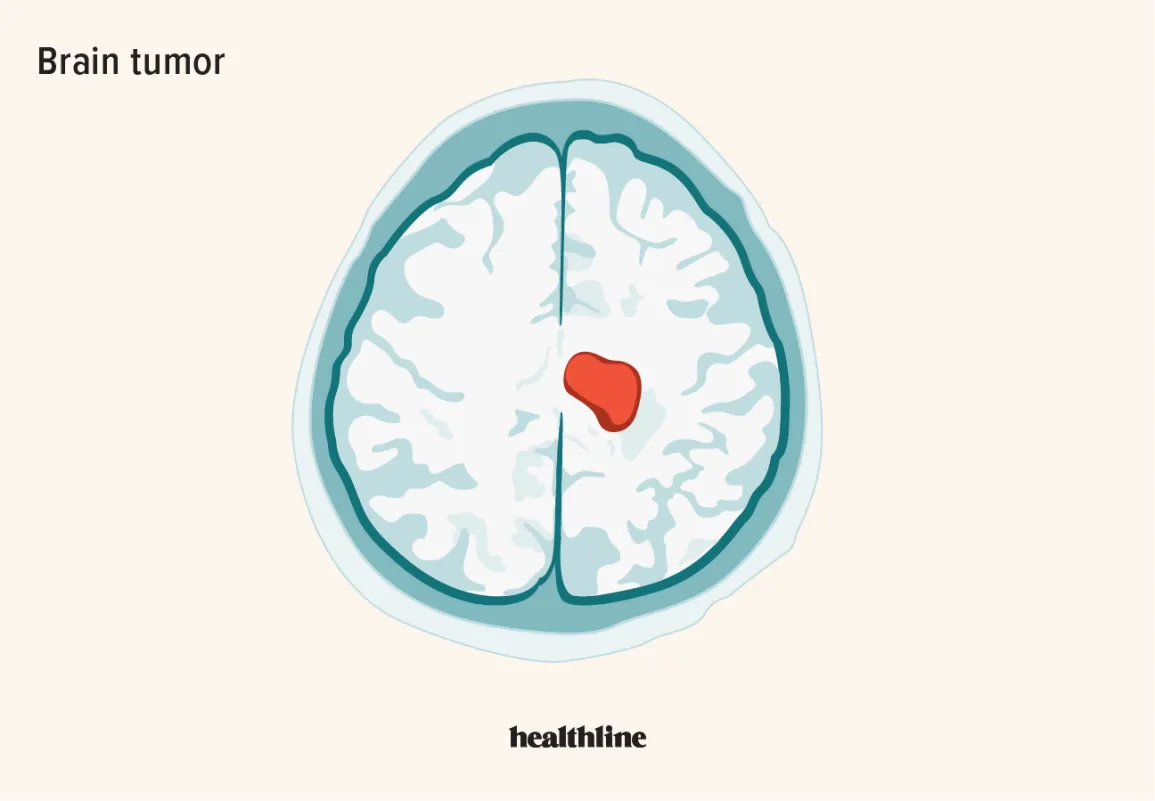

## 1. Overview
A stroke is a medical condition in which poor blood flow to the brain causes cell death. 
The main risk factors for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus,  kidney disease.
the goal of this project that predict if the patient have a stroke or not.

### Attribute Information
1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5) ever-married: "No" or "Yes"
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
7) Residencetype: "Rural" or "Urban"
8) avgglucoselevel: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient (NAN)

# Import Libraries


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib
import warnings

warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.2)

# Read Data

In [15]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,NaN,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,NaN,NaN,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis (EDA)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5095 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5090 non-null   float64
 4   heart_disease      5085 non-null   float64
 5   ever_married       5110 non-null   object 
 6   work_type          5097 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5103 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 479.2+ KB


 1. there are 12 columns and 5110 records in dataset.
 2. there are different data types like object, int and float.
 3. there are missing values in some columns like: gender, hypertension, heart_disease, work_type, bmi and smoking_status             


### Check duplication

In [17]:
df.duplicated().values.any()

False

there is no any dublication in data

In [18]:
categorical_columns = df[['gender','hypertension','heart_disease','ever_married','work_type', 'Residence_type',
                       'smoking_status', 'stroke']]
categorical_columns

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0.0,1.0,Yes,Private,Urban,formerly smoked,1
1,Female,0.0,0.0,Yes,Self-employed,Rural,never smoked,1
2,Male,NaN,1.0,Yes,Private,Rural,never smoked,1
3,Female,NaN,NaN,Yes,Private,Urban,smokes,1
4,Female,1.0,0.0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,NaN,1.0,0.0,Yes,Private,Urban,never smoked,0
5106,Female,0.0,0.0,Yes,Self-employed,Urban,never smoked,0
5107,NaN,0.0,0.0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0.0,0.0,Yes,Private,Rural,formerly smoked,0


### Make report about information for categorical data like:-
1. name of columns.
2. show of unique values.
3. number of values
4. number of missing values.
5. count of each value descending order.

In [19]:
for col in categorical_columns:
    print('Column:',col, '\n')
    print(f'Name of values:{df[col].unique()}', '\n')
    print(f'Number of values:{df[col].nunique()}', '\n')
    print(f'Number of missing values:{df[col].isnull().sum()}', '\n')
    print(f'Count of value:\n{df[col].value_counts()}')
    print('_'*50, '\n')

Column: gender 

Name of values:['Male' 'Female' 'Other' nan] 

Number of values:3 

Number of missing values:15 

Count of value:
Female    2986
Male      2108
Other        1
Name: gender, dtype: int64
__________________________________________________ 

Column: hypertension 

Name of values:[ 0. nan  1.] 

Number of values:2 

Number of missing values:20 

Count of value:
0.0    4592
1.0     498
Name: hypertension, dtype: int64
__________________________________________________ 

Column: heart_disease 

Name of values:[ 1.  0. nan] 

Number of values:2 

Number of missing values:25 

Count of value:
0.0    4809
1.0     276
Name: heart_disease, dtype: int64
__________________________________________________ 

Column: ever_married 

Name of values:['Yes' 'No'] 

Number of values:2 

Number of missing values:0 

Count of value:
Yes    3353
No     1757
Name: ever_married, dtype: int64
__________________________________________________ 

Column: work_type 

Name of values:['Private' 'Self

In [20]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
numerical_columns

['age', 'avg_glucose_level', 'bmi']

### Visaulization numerical features 

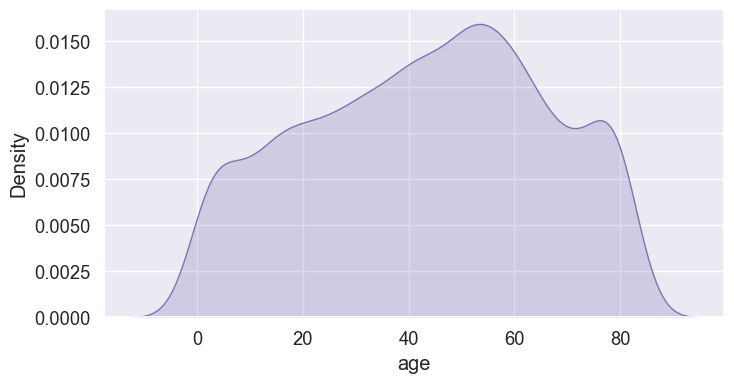

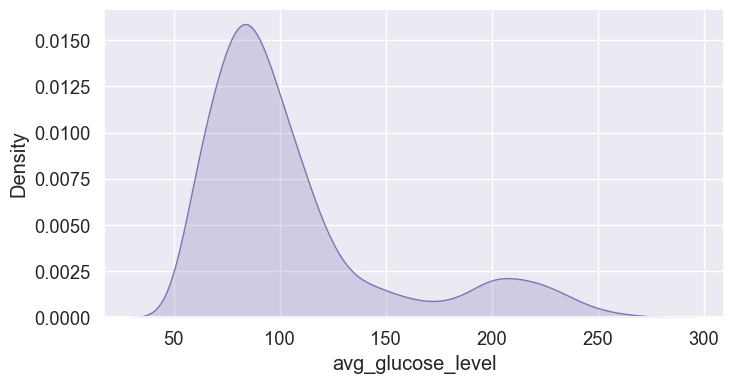

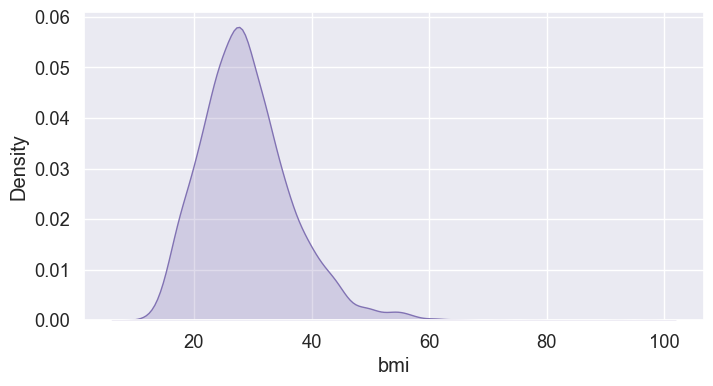

In [21]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], color='m', shade=True)
    plt.show()

In [22]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


- this plot show the distribution for this numerical features and some information like minimum, maximum and the median values
- there are some outliers in avg_glucose_level and bmi featrues 

### Visaulization categorical features

- this visualization show which value is higher (per percentage) than the remains values.

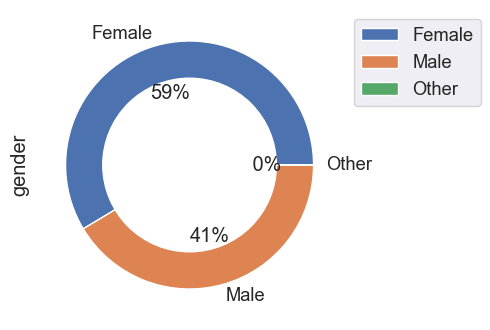

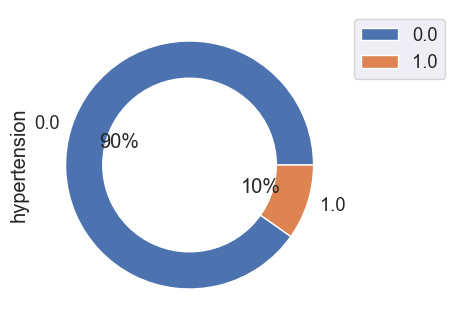

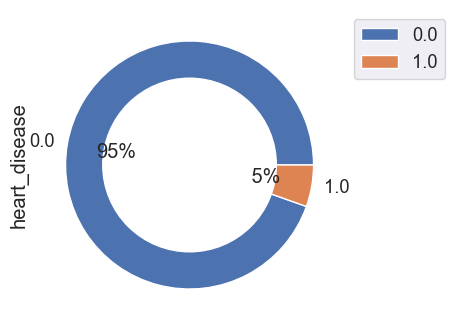

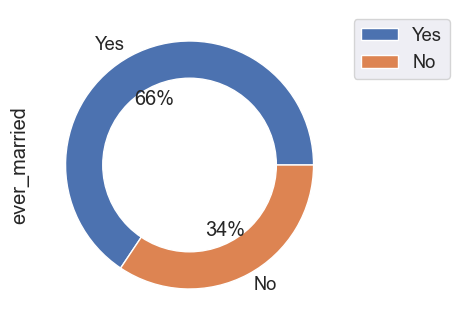

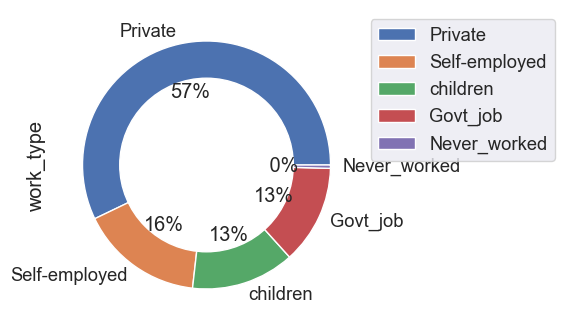

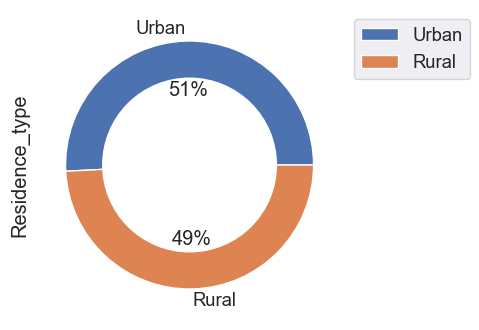

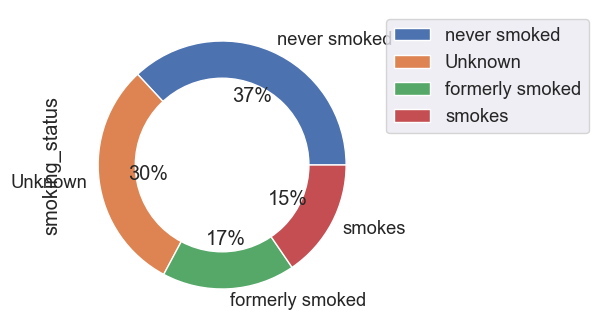

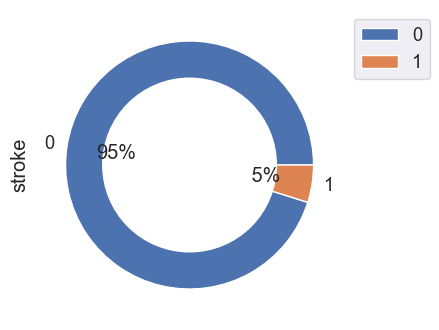

In [23]:
for col in categorical_columns:
    plt.figure(figsize=(4,6))
    df[col].value_counts().plot.pie(autopct='%2.f%%')
    center = plt.Circle((0,0), 0.7, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.legend(bbox_to_anchor=(1,1),loc=2)
    plt. show()

### Visualization outliers for numerical features

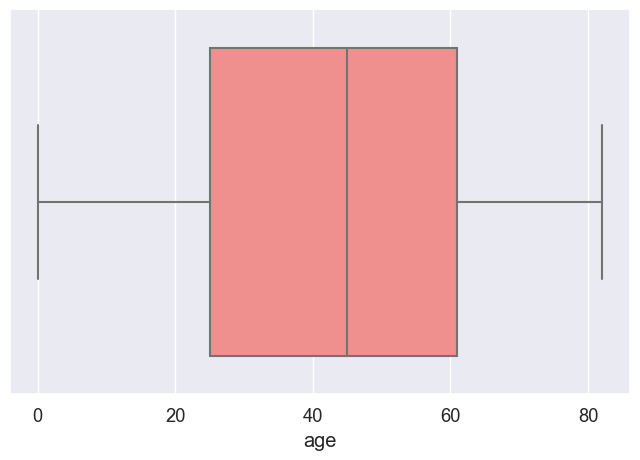

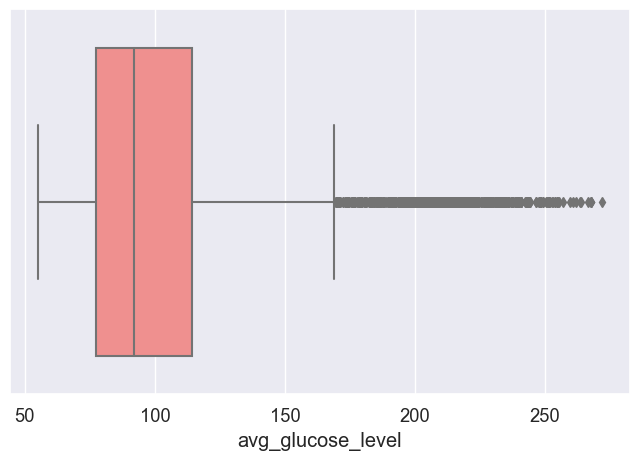

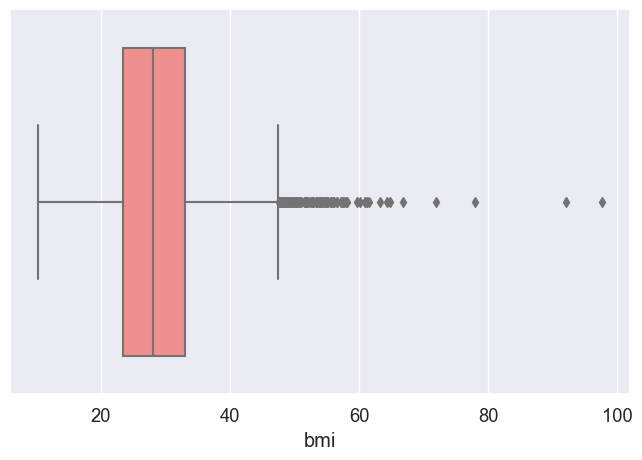

In [24]:
for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], palette='spring')
    plt.show()

- there are some outliers in avg_glucose_level and bmi featrues 

### Visualize features with target feature ans show what do the values affect to the target value

_____________________________________________________________________________________ 
 stroke     0    1
gender           
Female  2845  141
Male    2000  108
Other      1    0


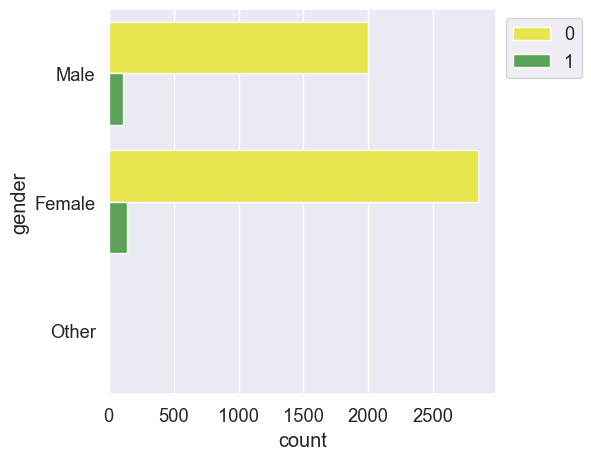

_____________________________________________________________________________________ 
 stroke           0    1
hypertension           
0.0           4429  163
1.0            432   66


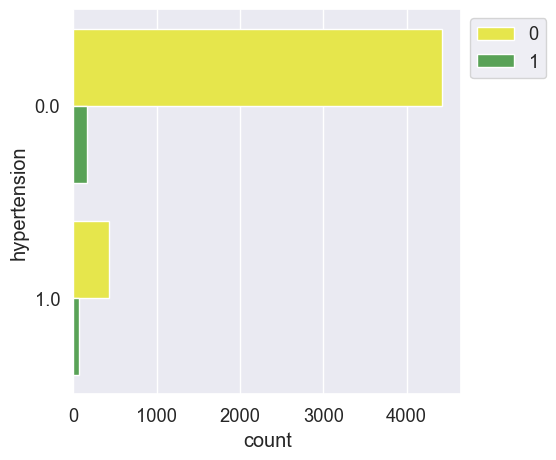

_____________________________________________________________________________________ 
 stroke            0    1
heart_disease           
0.0            4632  177
1.0             229   47


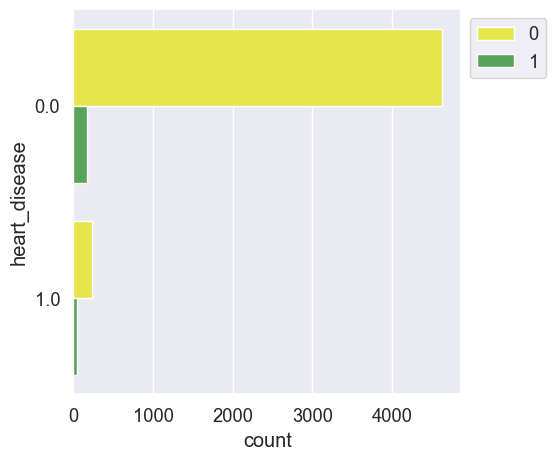

_____________________________________________________________________________________ 
 stroke           0    1
ever_married           
No            1728   29
Yes           3133  220


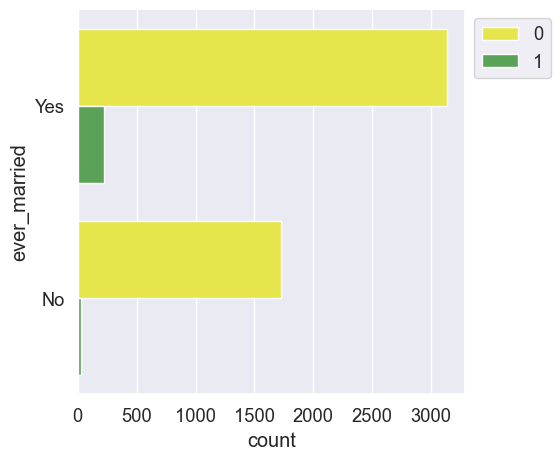

_____________________________________________________________________________________ 
 stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  136
Self-employed   754   65
children        685    2


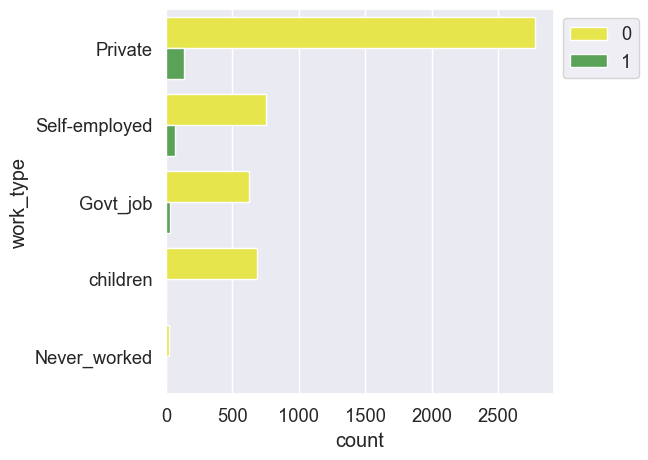

_____________________________________________________________________________________ 
 stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135


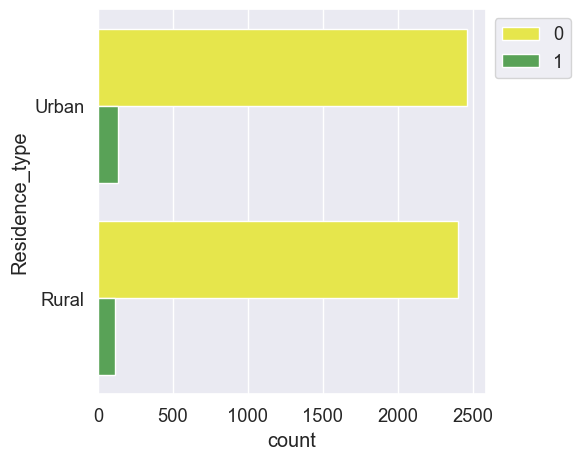

_____________________________________________________________________________________ 
 stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1801  84
smokes            747  42


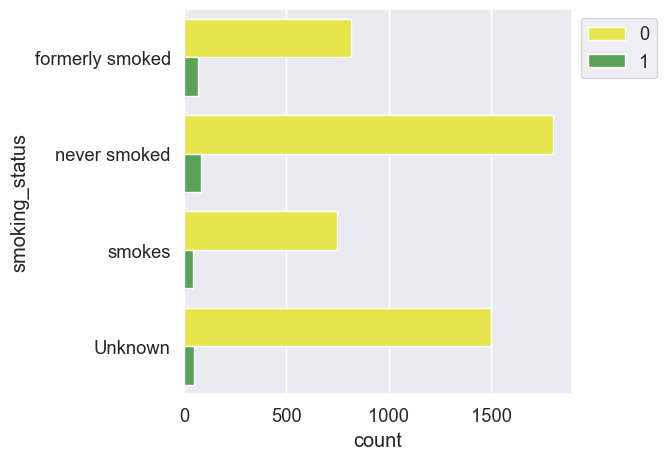

In [25]:
for col in categorical_columns:
    if col !='stroke':
        
        print('_'*85, '\n' , pd.crosstab(index=df[col], columns=df['stroke']))
        plt.figure(figsize=(5,5))
        sns.countplot(y=df[col], hue=df['stroke'], palette='Set1_r')
        plt.legend(bbox_to_anchor=(1,1),loc=2)
        plt.show()

# Data Preprocessing

### a. Drop unnecessary features

In [26]:
df.drop(['id'], axis=1, inplace=True)

### b. check missing values

In [27]:
df.isnull().sum()

gender                15
age                    0
hypertension          20
heart_disease         25
ever_married           0
work_type             13
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         7
stroke                 0
dtype: int64

In [28]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [29]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [30]:
for col in df[['gender', 'hypertension', 'heart_disease', 'work_type', 'smoking_status']]:
    print(col,': ',df[col].mode()[0], '\n')

gender :  Female 

hypertension :  0.0 

heart_disease :  0.0 

work_type :  Private 

smoking_status :  never smoked 



In [31]:
for col in df[['gender', 'hypertension', 'heart_disease', 'work_type', 'smoking_status']]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [32]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [34]:
df['smoking_status'] = df['smoking_status'].replace('Unknown', 'never smoked')

In [35]:
df['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [36]:
df['gender'].value_counts()

Female    3001
Male      2108
Other        1
Name: gender, dtype: int64

In [37]:
df['gender'] = df['gender'].replace('Other', 'Female')

In [38]:
df['gender'].value_counts()

Female    3002
Male      2108
Name: gender, dtype: int64

In [39]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
df.to_csv('data.csv', index=False)

### c. Encode Categorical Data

In [41]:
for col in df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [42]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.0,1.0,1,2,1,228.69,36.6,0,1
1,0,61.0,0.0,0.0,1,3,0,202.21,28.1,1,1
2,1,80.0,0.0,1.0,1,2,0,105.92,32.5,1,1
3,0,49.0,0.0,0.0,1,2,1,171.23,34.4,2,1
4,0,79.0,1.0,0.0,1,3,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1.0,0.0,1,2,1,83.75,28.1,1,0
5106,0,81.0,0.0,0.0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0.0,0.0,1,3,0,82.99,30.6,1,0
5108,1,51.0,0.0,0.0,1,2,0,166.29,25.6,0,0


### d. Correlation

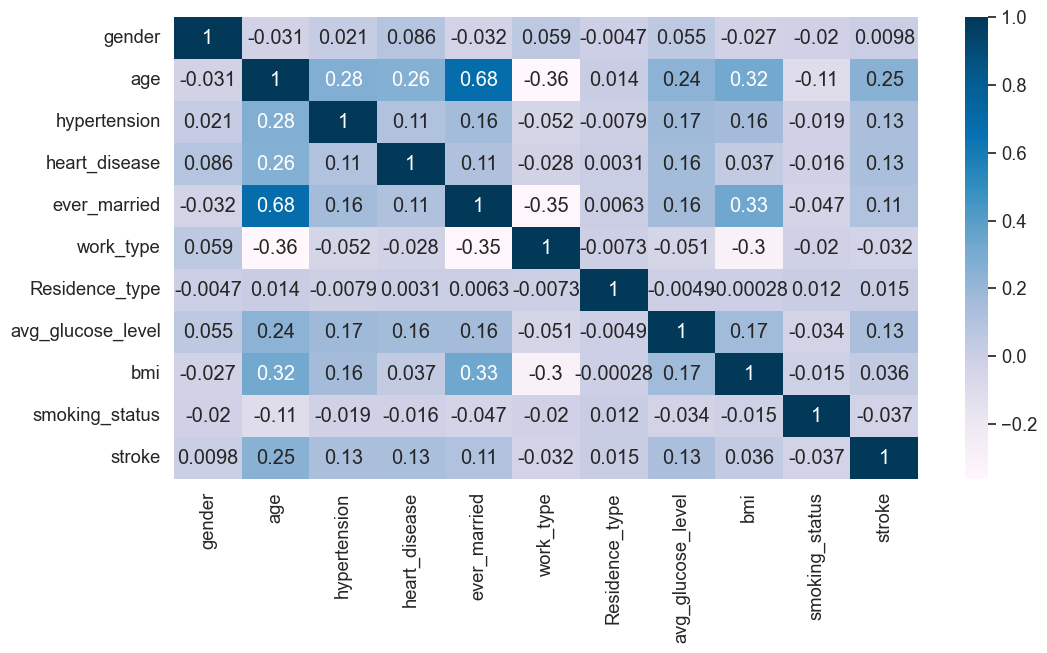

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.show()

### e. Use SMOTE to imbalanced target feature

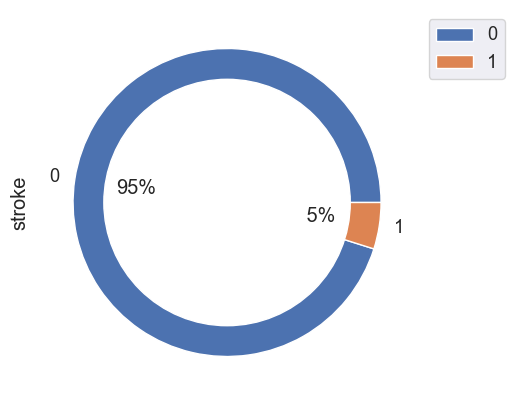

In [84]:
# Target feature before SMOTE
plt.figure(figsize=(5,5))
df['stroke'].value_counts().plot.pie(autopct='%2.f%%')
center = plt.Circle((0,0), 0.8, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt. show()

In [86]:
sm = SMOTE()
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('stroke', axis=1), df['stroke'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [90]:
oversampled_Y.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

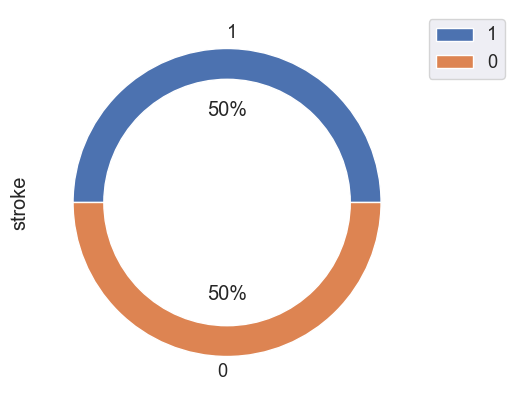

In [96]:
# Target feature before SMOTE
plt.figure(figsize=(5,5))
oversampled_Y.value_counts().plot.pie(autopct='%2.f%%')
center = plt.Circle((0,0), 0.8, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt. show()

### e. Split Data into tain and test sets

In [114]:
X = oversampled.drop('stroke', axis=1)
Y = oversampled['stroke']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)            

### h. Feature Scaling

In [116]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Development the model

### a. Training Model

In [117]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Naive" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier()
}

In [118]:
for name, model in models.items():
    print(f'Using model: {name}', '\n')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')
    print('-'*30)

Using model: LogisticRegression 

Training Score: 0.8036517937508036
Test Score: 0.794344473007712
------------------------------
Using model: Naive 

Training Score: 0.7897646907547897
Test Score: 0.790745501285347
------------------------------
Using model: KNN 

Training Score: 0.9288928892889289
Test Score: 0.893573264781491
------------------------------
Using model: SVC 

Training Score: 0.8639578243538639
Test Score: 0.8555269922879177
------------------------------
Using model: DecisionTreeClassifier 

Training Score: 1.0
Test Score: 0.9341902313624678
------------------------------
Using model: RandomForestClassifier 

Training Score: 1.0
Test Score: 0.9660668380462725
------------------------------
Using model: XGBClassifier 

Training Score: 0.9967853928249968
Test Score: 0.9640102827763496
------------------------------


In [119]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9967853928249968
0.9640102827763496


### b. Test XGBoostClassifier Model

In [120]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0.0,1.0,1,2,1,228.69,36.6,0
1,0,61.0,0.0,0.0,1,3,0,202.21,28.1,1
2,1,80.0,0.0,1.0,1,2,0,105.92,32.5,1
3,0,49.0,0.0,0.0,1,2,1,171.23,34.4,2
4,0,79.0,1.0,0.0,1,3,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1.0,0.0,1,2,1,83.75,28.1,1
5106,0,81.0,0.0,0.0,1,3,1,125.20,40.0,1
5107,0,35.0,0.0,0.0,1,3,0,82.99,30.6,1
5108,1,51.0,0.0,0.0,1,2,0,166.29,25.6,0


In [121]:
data=[1, 50, 1, 1, 1, 0, 0, 220, 30, 0]
data = scaler.transform([data])
data
predict = model.predict(data)
if predict == 1:
    print('Patient Has A Stroke')
else:
    print('Patient Has not A Stroke')

Patient Has not A Stroke


In [122]:
data=[1, 50, 1, 1, 1, 1, 1, 330, 60, 2]
data = scaler.transform([data])
data
predict = model.predict(data)
if predict == 1:
    print('Patient Has A Stroke')
else:
    print('Patient Has not A Stroke')

Patient Has A Stroke


### c. Save Model and Scaler for Depolyment

In [123]:
joblib.dump(model , "Model.h5")
joblib.dump(scaler , "scaler.h5" )

['scaler.h5']

### d. Deploy Model using Streamlit 

In [130]:
%%writefile project.py

import pandas as pd
import joblib
import streamlit as st
from sklearn.preprocessing import LabelEncoder


featuress = pd.read_csv("data.csv")
target = featuress.drop(columns=['stroke'])

st.set_page_config(page_title="Stroke Prediction", page_icon='images/istockphoto-1250205787-612x612.jpg')
st.title('Stroke Prediction', '\n')
st.image('images/istockphoto-1250205787-612x612.jpg')

st.subheader("Patient's Stroke Forcasting")

st.markdown("""
##### The goal of this application is to classify the patient has a stroke or not based on the characteristics or data of this person.
##### To predict whether the loan is accepted or not, just follow these steps:
##### 1. Enter information describing the patirnt's data.
##### 2. Press the "Predict" button and wait for the result.
# """)
st.image('images/pexels-anna-shvets-4226219.jpg')

expander = st.expander('Group Members For the Project')
expander.markdown("""
            **Eslam Ashraf Mohamed**\n
            **Ehab Tarek Ali**\n
            **Ahmed Abdallah Gamil**\n   
            """)
    
def user_input_features():

    st.sidebar.write('# Fill this form please..')

    gender = st.sidebar.radio("gender",
                                options=(gender for gender in featuress.gender.unique()))

    hypertension = st.sidebar.radio("Hypertension", 
                                options=(hypertension for hypertension in featuress.hypertension.unique()))
    
    heart_disease = st.sidebar.radio("Heart Disease", 
                                options=(heart_disease for heart_disease in featuress.heart_disease.unique()))

    ever_married = st.sidebar.radio("Ever Married", 
                                options=(ever_married for ever_married in featuress.ever_married.unique()))

    work_type = st.sidebar.radio("Work Type", 
                                options=(work_type for work_type in featuress.work_type.unique()))

    Residence_type = st.sidebar.selectbox("Residence Type",
                                    options=(Residence_type for Residence_type in featuress.Residence_type.unique()))

    smoking_status = st.sidebar.selectbox("Smoking Status", 
                                    (smoking_status for smoking_status in featuress.smoking_status.unique()))
    
    age = st.sidebar.slider('What is your Age ?', 0, 100)
    
    bmi = st.sidebar.slider('What is your BMI ?', 0, 100)

    avg_glucose_level = st.sidebar.slider('What is your avgerage glucose level ?', 0, 300)
    

    
    data = {
        "gender": gender,
        "age": age,
        "hypertension": hypertension,
        "heart_disease": heart_disease,
        "ever_married": ever_married,
        "work_type": work_type,
        "Residence_type": Residence_type,
        "avg_glucose_level": avg_glucose_level,
        "bmi": bmi,
        "smoking_status": smoking_status

        }

    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

df = pd.concat([input_df,target],axis=0)
for col in df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]:
    df[col] = LabelEncoder().fit_transform(df[col])


RF_MODEL_PATH = joblib.load("Models/model.h5")
RF_SCALER_PATH = joblib.load("Models/scaler.h5")

scaled_data = RF_SCALER_PATH.transform(df)
prediction_proba = RF_MODEL_PATH.predict_proba(scaled_data)

if st.sidebar.button('Predict'):
    st.sidebar.success(f'# The probability of the patient has a stroke is : {round(prediction_proba[0][1] * 100, 2)}%')

Overwriting project.py


In [84]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0.0,1.0,1,2,1,228.69,36.6,0
1,0,61.0,0.0,0.0,1,3,0,202.21,28.1,1
2,1,80.0,0.0,1.0,1,2,0,105.92,32.5,1
3,0,49.0,0.0,0.0,1,2,1,171.23,34.4,2
4,0,79.0,1.0,0.0,1,3,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1.0,0.0,1,2,1,83.75,28.1,1
5106,0,81.0,0.0,0.0,1,3,1,125.20,40.0,1
5107,0,35.0,0.0,0.0,1,3,0,82.99,30.6,1
5108,1,51.0,0.0,0.0,1,2,0,166.29,25.6,0
